### Угадываем признак

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [3]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [4]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


Не так много пустых, удалим все строки с пустыми ячейками

In [5]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


### Строим модель

Преобразуем категориальные переменные в колонки

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [8]:
y = data['sex']

In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
# OneHotEncoder дает слишком много колонок, которые не переваривает логистическая регрессия с настройками по умолчанию
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)
# _categ = data[['nationality','sport']]
# _transformed = pd.DataFrame(ohe.fit_transform(_categ))
# _transformed.index = _categ.index
# X = pd.concat([data[['height', 'weight', 'gold', 'silver', 'bronze']], _transformed], axis=1)

# поэтому для простоты удалим категориальные признаки
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]

In [11]:
le = LabelEncoder()
le.fit( data['sex'] )

LabelEncoder()

In [12]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [13]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)

Строим графики методами из sklearn

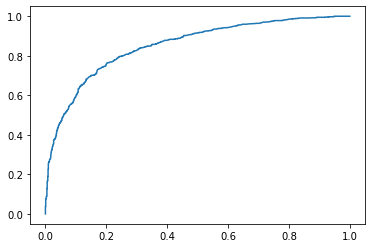

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

sk_fpr, sk_tpr, thres = roc_curve( y_test, predictions[:, 1])
from matplotlib import pyplot as plt
plt.plot( sk_fpr, sk_tpr )

In [15]:
roc_auc_score(y_test, predictions[:, 1])

0.8516834115327077

Вычисляем свои собственные метрики 

In [16]:
def rbt(number,threshold):
    return number // threshold
def state(y,y_,tr):
    y = pd.Series(y)
    y_ = pd.Series(y_)
    N_rows = y.shape[0]
    cols = ['y', 'y_', 'tp','fn', 'fp', 'tn'] 
    s = pd.DataFrame(np.zeros((N_rows, len(cols))), columns = cols, dtype = 'bool')
    s.y = y.reset_index().drop(columns=['index']).astype('bool')
    s.y_ = y_.reset_index().drop(columns=['index']).apply(lambda val: rbt(val,tr)).astype('bool')
    s.tp = s.y & s.y_
    s.fn = s.y & ~s.y_
    s.fp = ~s.y & s.y_
    s.tn = ~s.y & ~s.y_
    return s
def tpr(y, y_pre,th):
    s = state(y, y_pre,th)
    return s.tp.sum()/(s.tp.sum() + s.fn.sum())
def fpr(y, y_pre,th):
    s = state(y, y_pre,th)
    return s.fp.sum()/(s.fp.sum() + s.tn.sum())
def pre(y, y_pre,th):
    s = state(y, y_pre,th)
    return s.tp.sum()/(s.tp.sum() + s.fp.sum())
def re(y, y_pre,th):
    s = state(y, y_pre,th)
    return s.tp.sum()/(s.tp.sum() + s.fn.sum())

In [17]:
fpr(y_test,predictions[:,1],0.5)

0.23837209302325582

Строим графики ROC и Precision Recall по свобственным метрикам

In [18]:
n_points = 100
cols =  ['thr','tpr','fpr','pre','re']
data = pd.DataFrame(np.zeros((n_points,len(cols))),columns = cols)
data.thr = np.linspace(0.0, 1.0, num=n_points)
data.tpr = data.apply(lambda row: tpr(y_test,predictions[:,1],row.thr) , axis = 1)
data.fpr = data.apply(lambda row: fpr(y_test,predictions[:,1],row.thr) , axis = 1)
data.pre = data.apply(lambda row: pre(y_test,predictions[:,1],row.thr) , axis = 1)
data.re = data.apply(lambda row: re(y_test,predictions[:,1],row.thr) , axis = 1)

<ipython-input-16-ebcf9dd2be20>:24: RuntimeWarning: invalid value encountered in longlong_scalars
  return s.tp.sum()/(s.tp.sum() + s.fp.sum())


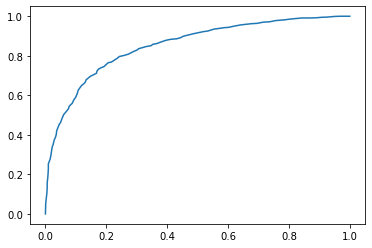

In [19]:
# ROC
plt.plot( data.fpr, data.tpr )

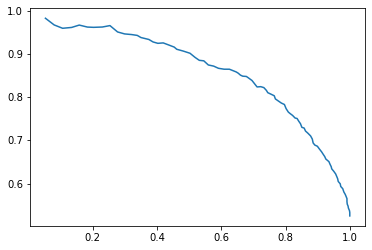

In [20]:
# Precision Recall
plt.plot( data.re, data.pre )

Объединяем графики для сравнения. Разницы практически нет, значит посчитаны метрики корректно.

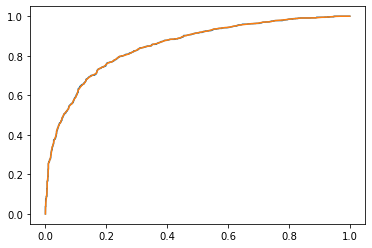

In [21]:
plt.plot( sk_fpr, sk_tpr, data.fpr, data.tpr)